<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Number-of-goals-by-team-depending-from-the-weather" data-toc-modified-id="Number-of-goals-by-team-depending-from-the-weather-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Number of goals by team depending from the weather</a></span></li><li><span><a href="#Number-of-goals-by-team-depending-from-the-weather" data-toc-modified-id="Number-of-goals-by-team-depending-from-the-weather-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Number of goals by team depending from the weather</a></span></li><li><span><a href="#mean-goals-per-match-from-weather" data-toc-modified-id="mean-goals-per-match-from-weather-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>mean goals per match from weather</a></span></li></ul></div>

In [14]:
import sqlite3

name_db = 'data.sqlite'

connection =sqlite3.connect(name_db)
cur = connection.cursor()

In [17]:
pd.read_sql_query(f"""
SELECT teams.name, matches_teams.team_goal 
FROM teams 
JOIN matches_teams 
ON teams.id=matches_teams.team_id ;""",
                                 connection)

<IPython.core.display.Javascript object>

,name,team_goal
0,Bordeaux,0
1,FC Nantes,0
2,DFCO,0
3,SCO Angers,1
4,LOSC,1
...,...,...
755,DFCO,1
756,Reims,1
757,Bordeaux,2
758,Strasbourg,1


In [21]:
team_meteo = pd.read_sql_query(f"""
SELECT m.temperature,m.rainfall, t.name,  mt.team_goal 
FROM matches_teams as mt 
JOIN matches as m 
ON mt.match_id=m.id 
JOIN teams as t 
ON t.id=mt.team_id 
;""",
                                 connection)

<IPython.core.display.Javascript object>

In [63]:
player_meteo = pd.read_sql_query(f""" 
SELECT m.temperature, m.rainfall, p.last_name, t.city, m.id
FROM goals as g 
JOIN players as p 
ON g.player_id=p.id 
JOIN matches as m 
ON g.match_id=m.id 
JOIN teams as t 
ON t.id = p.team_id
;""",
                                 connection)

<IPython.core.display.Javascript object>

In [64]:
player_meteo

,temperature,rainfall,last_name,city,id
0,22.0,19.0,I. Traoré,Angers,2
1,19.0,1.0,J. Bamba,Lille,3
2,19.0,1.0,D. Da Silva,Rennes,3
3,25.5,1.0,A. Disasi,Monaco,4
4,25.5,1.0,B. Badiashile,Monaco,4
...,...,...,...,...,...
1044,10.5,1.0,E. Touré,Reims,379
1045,10.5,1.0,Y. Adli,Bordeaux,379
1046,10.5,1.0,E. Kwateng,Bordeaux,379
1047,12.0,2.0,H. Diallo,Strasbourg,380


In [27]:
team_meteo

,temperature,rainfall,name,team_goal
0,22.5,5.0,Bordeaux,0
1,22.5,5.0,FC Nantes,0
2,22.0,19.0,DFCO,0
3,22.0,19.0,SCO Angers,1
4,19.0,1.0,LOSC,1
...,...,...,...,...
755,12.0,0.0,DFCO,1
756,10.5,1.0,Reims,1
757,10.5,1.0,Bordeaux,2
758,12.0,2.0,Strasbourg,1


In [22]:
import seaborn as sns


In [25]:
team_meteo['name'].unique()

array(['Bordeaux', 'FC Nantes', 'DFCO', 'SCO Angers', 'LOSC', 'Rennes',
       'AS Monaco', 'Reims', 'FC Lorient', 'Strasbourg', 'Nîmes', 'Brest',
       'OGC Nice', 'Lens', 'Montpellier', 'OL', 'PSG', 'FC Metz', 'OM',
       'ASSE'], dtype=object)

<AxesSubplot:xlabel='rainfall', ylabel='temperature'>

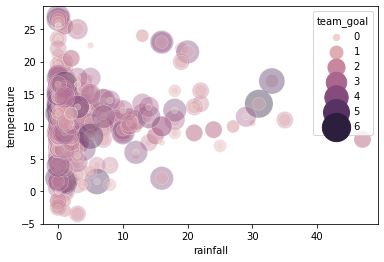

In [60]:
#for club in team_meteo['name'].unique():
df = team_meteo#[team_meteo['name']==club]
sns.scatterplot(data = df, x = 'rainfall', y= 'temperature', hue = 'team_goal', size = 'team_goal', sizes=(40, 800), alpha = 0.4 )

<AxesSubplot:xlabel='rainfall', ylabel='temperature'>

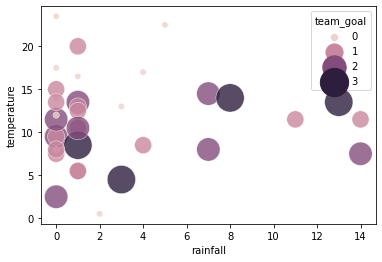

In [55]:
df = team_meteo[team_meteo['name']=='Bordeaux']
sns.scatterplot(data = df, x = 'rainfall', y= 'temperature', hue = 'team_goal', size = 'team_goal', sizes=(40, 800), alpha = 0.8)

In [39]:
rain_group = df[['rainfall', 'team_goal']].groupby(by= 'rainfall', as_index = False ).sum()
rain_group

,rainfall,team_goal
0,0.0,11
1,1.0,13
2,2.0,0
3,3.0,3
4,4.0,1
5,5.0,0
6,7.0,4
7,8.0,3
8,11.0,1
9,13.0,3


<AxesSubplot:xlabel='rainfall', ylabel='team_goal'>

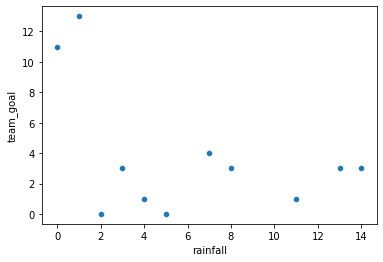

In [40]:
sns.scatterplot(data = rain_group, x = 'rainfall', y = 'team_goal')

In [41]:
temperature_group = df[['temperature', 'team_goal']].groupby(by= 'temperature', as_index = False ).sum()
temperature_group

,temperature,team_goal
0,0.5,0
1,2.5,2
2,4.5,3
3,5.5,2
4,7.5,3
5,8.0,3
6,8.5,4
7,9.5,3
8,10.5,3
9,11.5,4


<AxesSubplot:xlabel='temperature', ylabel='team_goal'>

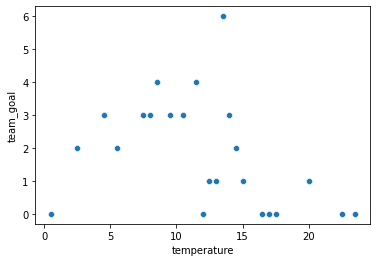

In [46]:
sns.scatterplot(data = temperature_group, x = 'temperature', y = 'team_goal')

In [ ]:
#for club in team_meteo['name'].unique():

sns.scatterplot(data = df, x = 'rainfall', y= 'temperature', hue = 'team_goal', size = 'team_goal', sizes=(40, 800), alpha = 0.4 )

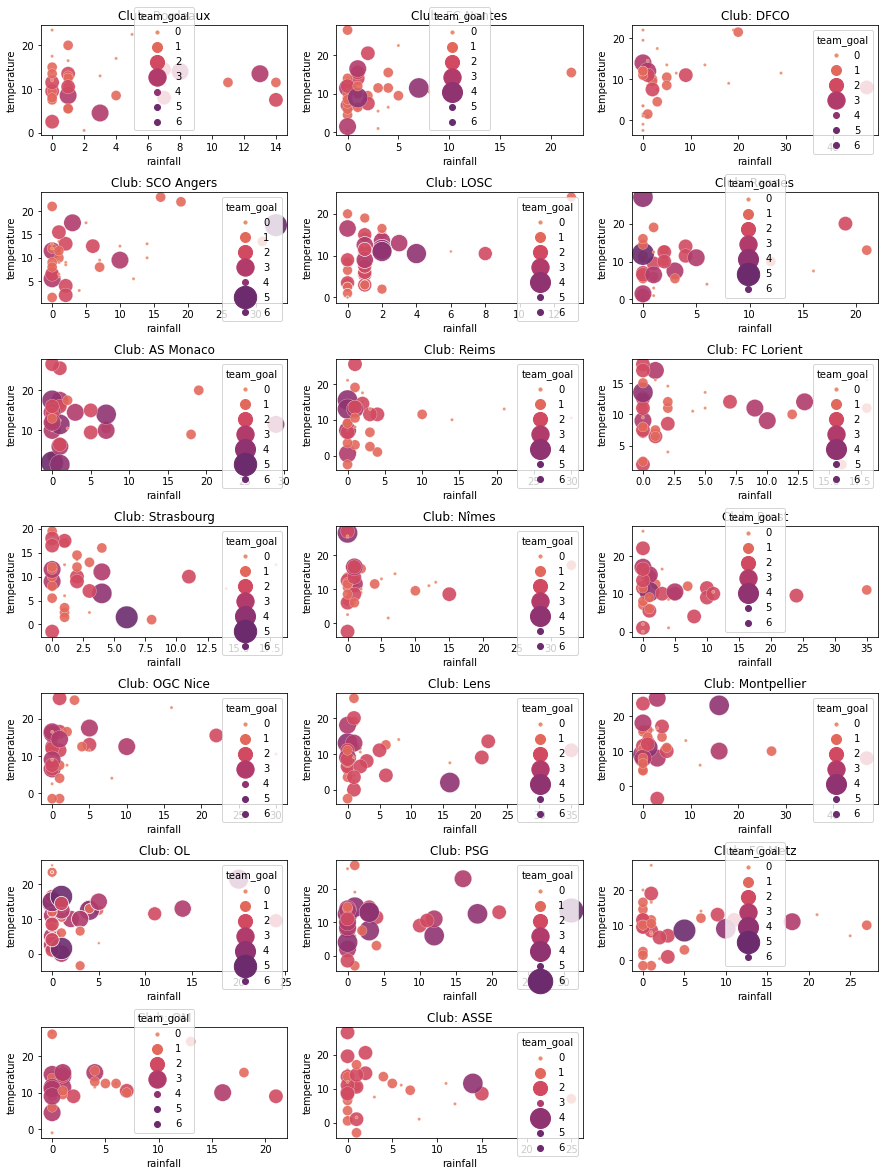

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec


pal = sns.color_palette("flare").as_hex()
num_plots = len(team_meteo['name'].unique())

cols = 3
rows = num_plots // cols if num_plots % cols == 0 else num_plots // cols + 1

fig = plt.figure(figsize=(cols * 5, rows * 3))
gs0 = gridspec.GridSpec(rows, cols, figure=fig)

for i, club in enumerate(team_meteo['name'].unique()):
    df = team_meteo[team_meteo['name']==club]
    gs00 = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=gs0[i])

    ax1 = fig.add_subplot(gs00[:-1, :])
    sns.scatterplot(data = df, 
                    x = 'rainfall', 
                    y= 'temperature', 
                    hue = 'team_goal', 
                    hue_order = [0,1,2,3,4,5,6], 
                    size = 'team_goal', 
                    sizes = {0: 10, 1:100, 2: 200, 3: 300, 4: 400, 5:500, 6:600}, 
                    palette = {0:pal[0], 1:pal[1], 2:pal[2], 3:pal[3], 4:pal[4], 5:pal[5], 6:pal[5]}, 
                    alpha = 0.9, 
                    ax=ax1)
    
    ax1.set_xlabel("rainfall")
    ax1.set_ylabel("temperature")
    ax1.set_title(f"Club: {club}")

### Number of goals by team depending from the weather

In [123]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import pandas as pd

def plot_club_goals_meteo(club):
    df = team_meteo[team_meteo['name']==club]
    sns.scatterplot(data = df, 
                    x = 'rainfall', 
                    y= 'temperature', 
                    hue = 'team_goal', 
                    hue_order = [0,1,2,3,4,5,6], 
                    size = 'team_goal', 
                    sizes = {0: 10, 1:100, 2: 200, 3: 300, 4: 400, 5:500, 6:600}, 
                    alpha = 0.9)


In [124]:
w = interactive(plot_club_goals_meteo, club = 
                        widgets.Dropdown(
                        options=team_meteo['name'].unique(),
                        value='Bordeaux', 
                        layout={'width': 'max-content'},
                        description='Model:',)  )
display(w)

interactive(children=(Dropdown(description='Model:', layout=Layout(width='max-content'), options=('Bordeaux', …

### Number of goals by team depending from the weather

In [96]:
player_meteo

,temperature,rainfall,last_name,city,id
0,22.0,19.0,I. Traoré,Angers,2
1,19.0,1.0,J. Bamba,Lille,3
2,19.0,1.0,D. Da Silva,Rennes,3
3,25.5,1.0,A. Disasi,Monaco,4
4,25.5,1.0,B. Badiashile,Monaco,4
...,...,...,...,...,...
1044,10.5,1.0,E. Touré,Reims,379
1045,10.5,1.0,Y. Adli,Bordeaux,379
1046,10.5,1.0,E. Kwateng,Bordeaux,379
1047,12.0,2.0,H. Diallo,Strasbourg,380


In [97]:
player_meteo["player-club"] = player_meteo.last_name + ': ' + player_meteo.city

In [108]:
def plot_player_goals_meteo(player):
    df = player_meteo[player_meteo['player-club']==player]
    sns.scatterplot(data = df, 
                    x = 'rainfall', 
                    y= 'temperature',  
                    alpha = 0.9)

In [109]:
number_goals_by_player = player_meteo[['player-club', 'temperature']].groupby(by='player-club', as_index=False).count()
number_goals_by_player = number_goals_by_player.sort_values(by= 'temperature', ascending = False)
players_list = number_goals_by_player['player-club'].values

In [110]:
w = interactive(plot_player_goals_meteo, player = 
                        widgets.Dropdown(
                        options=players_list,
                        value=players_list[0], 
                        layout={'width': 'max-content'},
                        description='Model:',)  )
display(w)

interactive(children=(Dropdown(description='Model:', layout=Layout(width='max-content'), options=('K. Mbappé: …

Text(0.5, 1.0, 'All goals for in the championship')

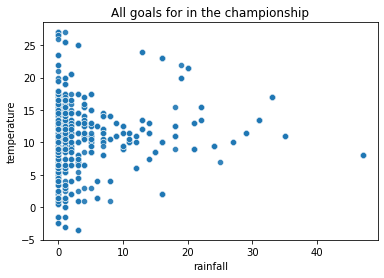

In [115]:
sns.scatterplot(data = player_meteo, 
                x = 'rainfall', 
                y= 'temperature',  
                alpha = 0.9)
plt.title("All goals for in the championship")

<AxesSubplot:xlabel='rainfall', ylabel='Count'>

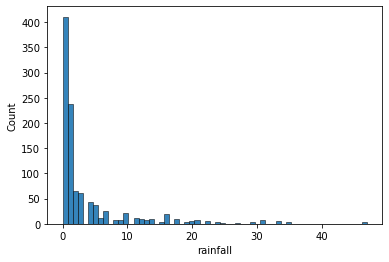

In [112]:
sns.histplot(data = player_meteo, 
                x = 'rainfall',  
                alpha = 0.9)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

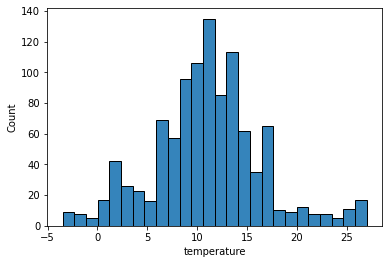

In [113]:
sns.histplot(data = player_meteo, 
                x = 'temperature',  
                alpha = 0.9)

In [116]:
player_meteo["is_rain"] = [True if mm>1 else False for mm in player_meteo['rainfall']]

Text(0.5, 1.0, 'Total goals for in the championship distribution for different temperature')

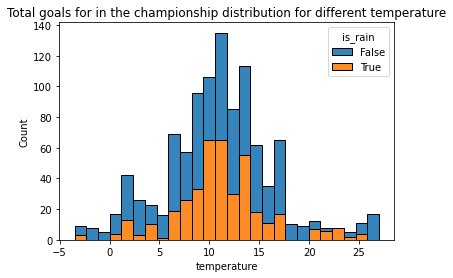

In [122]:
sns.histplot(data = player_meteo, 
                x = 'temperature', 
                hue = 'is_rain',
                multiple="stack",
                alpha = 0.9)
plt.title("Total goals for in the championship distribution for different temperature")

### mean goals per match from weather

In [143]:
df1 = player_meteo[['temperature', 'is_rain', 'id', 'last_name']].groupby(by = ['temperature', 'is_rain', 'id'], as_index= False).count()
df1 = df1.rename(columns = {"last_name": "number_goals_per_match"})

In [163]:
no_rain = df1[df1.is_rain == False]
df_no_rain = no_rain[['temperature', 'number_goals_per_match']].groupby(by = 'temperature', as_index= False).sum()
df_no_rain = df_no_rain.rename(columns = {"number_goals_per_match": "total_goals"})
df_no_rain['num_match'] = no_rain[['temperature', 'id']].groupby(by = 'temperature', as_index= False).count()["id"]
df_no_rain['mean_goals_per_match'] = df_no_rain['total_goals']/df_no_rain['num_match']

In [164]:
rain = df1[df1.is_rain == True]
df_rain = rain[['temperature', 'number_goals_per_match']].groupby(by = 'temperature', as_index= False).sum()
df_rain = df_rain.rename(columns = {"number_goals_per_match": "total_goals"})
df_rain['num_match'] = rain[['temperature', 'id']].groupby(by = 'temperature', as_index= False).count()["id"]
df_rain['mean_goals_per_match'] = df_rain['total_goals']/df_rain['num_match']

Text(0.5, 1.0, 'Mean goals per match by temperature')

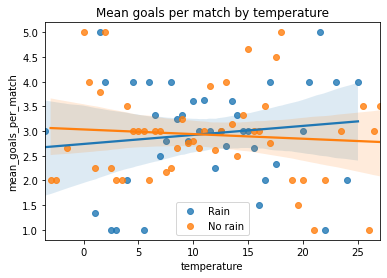

In [179]:
ax = sns.regplot(data = df_rain, x= 'temperature', y= 'mean_goals_per_match', label='Rain')
ax = sns.regplot(data = df_no_rain, x= 'temperature', y= 'mean_goals_per_match', label='No rain')
ax.legend()
plt.title("Mean goals per match by temperature")

Text(0.5, 1.0, 'Residuals plot of mean goals per match by temperature')

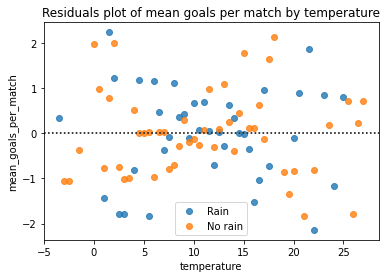

In [186]:
ax = sns.residplot(data = df_rain, x= 'temperature', y= 'mean_goals_per_match' , label='Rain')
ax = sns.residplot(data = df_no_rain, x= 'temperature', y= 'mean_goals_per_match', label='No rain')
ax.legend()
plt.title("Residuals plot of mean goals per match by temperature")